# Research Question 1

## Which Gen 1 starter and its evolutions have more success at evolving with strong stats?

In [53]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from scipy import stats

# PokeAPI Evolution Details URLs
url_chain_bulbasaur = "https://pokeapi.co/api/v2/evolution-chain/1/"
url_evolution_bulbasaur = "https://pokeapi.co/api/v2/pokemon-species/1/"
url_evolution_ivysaur = "https://pokeapi.co/api/v2/pokemon-species/2/"
url_evolution_venusaur = "https://pokeapi.co/api/v2/pokemon-species/3/"

url_chain_charmander = "https://pokeapi.co/api/v2/evolution-chain/2/"
url_evolution_charmander = "https://pokeapi.co/api/v2/pokemon-species/4/"
url_evolution_charmeleon = "https://pokeapi.co/api/v2/pokemon-species/5/"
url_evolution_charizard = "https://pokeapi.co/api/v2/pokemon-species/6/"

url_chain_squirtle = "https://pokeapi.co/api/v2/evolution-chain/3/"
url_evolution_squirtle = "https://pokeapi.co/api/v2/pokemon-species/7/"
url_evolution_wartotle = "https://pokeapi.co/api/v2/pokemon-species/8/"
url_evolution_blastoise = "https://pokeapi.co/api/v2/pokemon-species/9/"

# Get Data from the Evolution Dataset
chain_bulbasaur_json = requests.get(url_chain_bulbasaur).json()
evolution_bulbasaur_json = requests.get(url_evolution_bulbasaur).json()
evolution_ivysaur_json = requests.get(url_evolution_ivysaur).json()
evolution_venusaur_json = requests.get(url_evolution_bulbasaur).json()

chain_charmander_json = requests.get(url_chain_charmander).json()
evolution_charmander_json = requests.get(url_evolution_charmander).json()
evolution_charmeleon_json = requests.get(url_evolution_charmeleon).json()
evolution_charizard_json = requests.get(url_evolution_charizard).json()

chain_squirtle_json = requests.get(url_chain_squirtle).json()
evolution_squirtle_json = requests.get(url_evolution_squirtle).json()
evolution_wartotle_json = requests.get(url_evolution_wartotle).json()
evolution_blastoise_json = requests.get(url_evolution_blastoise).json()

# Extracting Data from the Evolution Dataset
bulbasaur_name = evolution_bulbasaur_json["name"]
bulbasaur_evolutions = chain_bulbasaur_json["chain"]
bulbasaur_evolves_to = bulbasaur_evolutions["evolves_to"]
bulbasaur_min_levels = [16,16] # numbers are in addition increments starting at zero from "evolves_to" list
ivysaur_name = evolution_ivysaur_json["name"]
venusaur_name = evolution_venusaur_json["name"]

charmander_name = evolution_charmander_json["name"]
charmander_evolutions = chain_charmander_json["chain"]
charmander_evolves_to = charmander_evolutions["evolves_to"]
charmander_min_levels = [16,20] # numbers are in addition increments starting at zero from "evolves_to" list
charmeleon_name = evolution_charmeleon_json["name"]
charizard_name = evolution_charizard_json["name"]

squirtle_name = evolution_squirtle_json["name"]
squirtle_evolutions = chain_squirtle_json["chain"]
squirtle_evolves_to = squirtle_evolutions["evolves_to"]
squirtle_min_levels = [16,20] # numbers are in addition increments starting at zero from "evolves_to" list
wartotle_name = evolution_wartotle_json["name"]
blastoise_name = evolution_blastoise_json["name"]

# Build DataFrame
df = pd.DataFrame({
    "Bulbasaur-Ivysaur First Evolution": [bulbasaur_min_levels[0]],
    "Charmander-Charmeleon First Evolution": [charmander_min_levels[0]],
    "Squirtle-Wartotle First Evolution": [squirtle_min_levels[0]],
    "Ivysaur-Venusaur Second Evolution": [bulbasaur_min_levels[1]],
    "Charmeleon-Charizard Second Evolution": [charmander_min_levels[1]],
    "Wartotle-Blastoise Second Evolution": [squirtle_min_levels[1]]},
    index = ["Min Level Addition Increments"])

# Display DataFrame
df

,Bulbasaur-Ivysaur First Evolution,Charmander-Charmeleon First Evolution,Squirtle-Wartotle First Evolution,Ivysaur-Venusaur Second Evolution,Charmeleon-Charizard Second Evolution,Wartotle-Blastoise Second Evolution
Min Level Addition Increments,16,16,16,16,20,20


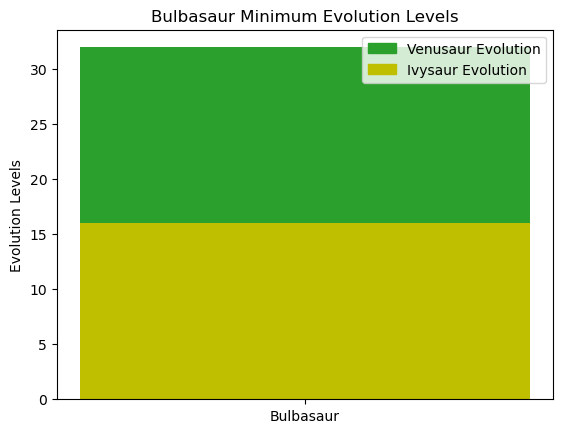

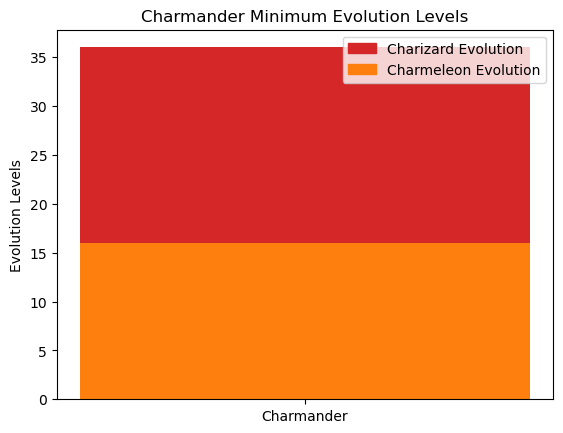

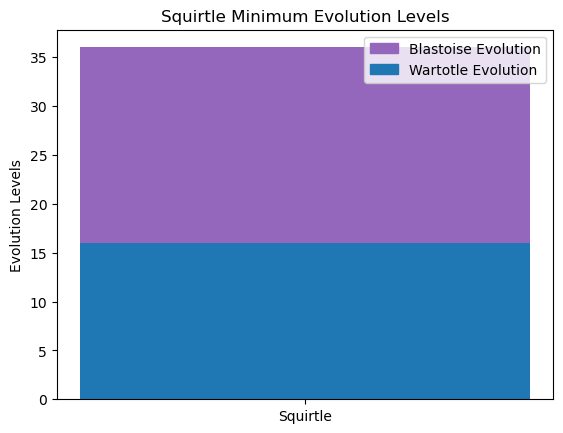

In [54]:
# Create Stacked Bar Graphs for each Gen 1 Pokémon Starter
pokemon_names = ["Bulbasaur", "Charmander", "Squirtle"]

top_bulbasaur = np.array([bulbasaur_min_levels[1]])
bottom_bulbasaur = np.array([bulbasaur_min_levels[0]])

top_charmander = np.array([charmander_min_levels[1]])
bottom_charmander = np.array([charmander_min_levels[0]])

top_squirtle = np.array([squirtle_min_levels[1]])
bottom_squirtle = np.array([squirtle_min_levels[0]])

fig1 = plt.figure()
plt.bar(pokemon_names[0], top_bulbasaur, bottom=bottom_bulbasaur, color='tab:green')
plt.bar(pokemon_names[0], bottom_bulbasaur, color='y')
plt.title("Bulbasaur Minimum Evolution Levels")
plt.ylabel("Evolution Levels")
colors = {'Venusaur Evolution':'tab:green', 'Ivysaur Evolution':'y'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig("output_data/bulbasaur_min_evo_levels.png") # save figure

fig2 = plt.figure()
plt.bar(pokemon_names[1], top_charmander, bottom=bottom_charmander, color='tab:red')
plt.bar(pokemon_names[1], bottom_charmander, color='tab:orange')
plt.title("Charmander Minimum Evolution Levels")
plt.ylabel("Evolution Levels")
colors = {'Charizard Evolution':'tab:red', 'Charmeleon Evolution':'tab:orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig("output_data/charmander_min_evo_levels.png") # save figure

fig3 = plt.figure()
plt.bar(pokemon_names[2], top_squirtle, bottom=bottom_squirtle, color='tab:purple')
plt.bar(pokemon_names[2], bottom_squirtle, color='tab:blue')
plt.title("Squirtle Minimum Evolution Levels")
plt.ylabel("Evolution Levels")
colors = {'Blastoise Evolution':'tab:purple', 'Wartotle Evolution':'tab:blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.savefig("output_data/squirtle_min_evo_levels.png") # save figure

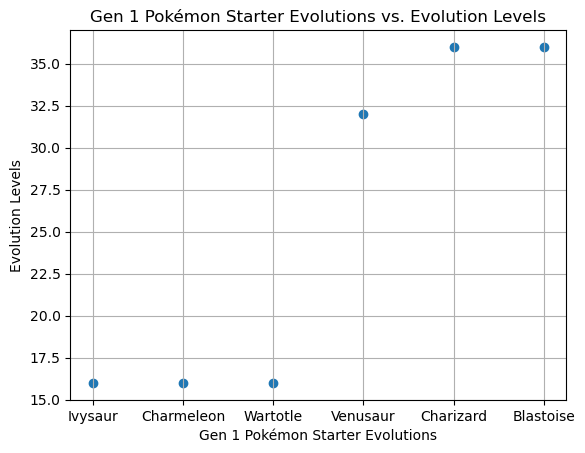

The r-value is: 0.0075
The line equation is: y = 1.0x + 23.33


In [55]:
# Build a Scatter Plot for Gen 1 Pokémon Starter Evolutions
x_values = ["Ivysaur", "Charmeleon", "Wartotle",
            "Venusaur", "Charizard", "Blastoise"]
y_values = [16, 16, 16, 32, 36, 36]
fig4 = plt.figure()
plt.scatter(x_values, y_values)
plt.xlabel("Gen 1 Pokémon Starter Evolutions")
plt.ylabel("Evolution Levels")
plt.title("Gen 1 Pokémon Starter Evolutions vs. Evolution Levels")
plt.grid()
plt.savefig("output_data/starters_vs_all_evo_levels.png") # save figure

# Show the Scatter Plot
plt.show()

# Create Linear Regression Equation
x_values_ = [1, 2, 3, 1, 2, 3]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

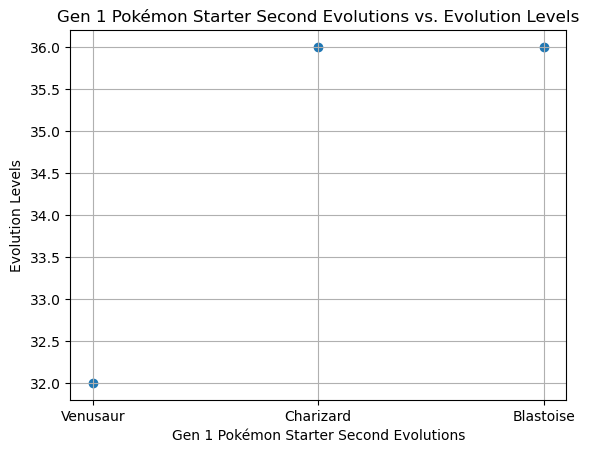

The r-value is: 0.7499999999999999
The line equation is: y = 2.0x + 30.67


In [56]:
# Build Scatter Plot for Gen 1 Pokémon Starter Second Evolutions
x_values__ = ["Venusaur", "Charizard", "Blastoise"]
y_values_ = [32, 36, 36]
fig5 = plt.figure()
plt.scatter(x_values__,y_values_)
plt.xlabel("Gen 1 Pokémon Starter Second Evolutions")
plt.ylabel("Evolution Levels")
plt.title("Gen 1 Pokémon Starter Second Evolutions vs. Evolution Levels")
plt.grid()
plt.savefig("output_data/starters_vs_second_evo_levels.png") # save figure

# Show the Scatter Plot
plt.show()

# Create Linear Regression Equation
x_values_ = [1, 2, 3]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_, y_values_)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")